In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import linregress

In [2]:
def plot_group(df, group):

    if isinstance(group, str):
        group_list = [group]
    else:
        assert isinstance(group, list)
        group_list = group

    # visualize
    fig, axes = plt.subplots(
        figsize=(2.5 * len(group_list), 3),
        dpi=150,
        ncols=len(group_list),
        sharex=True,
        sharey=True,
    )
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    for i, group in enumerate(group_list):
        ax = axes[i]
        if len(np.unique(df[group])) > 5:
            q_var = pd.qcut(df[group], 5).cat.codes
        else:
            q_var = df[group]

        sns.scatterplot(
            data=df, x="cal_pred", y="pheno", linewidth=0, s=2, hue=q_var, ax=ax
        )

        for q, df_q in df.groupby(q_var):
            sns.regplot(
                data=df_q, x="cal_pred", y="pheno", scatter=False, label=q, ax=ax
            )

        ax.axline(
            (df.pheno.mean(), df.pheno.mean()),
            slope=1,
            color="black",
            ls="--",
        )
        ax.legend(ncol=len(np.unique(q_var)), fontsize=5)
        ax.set_title(trait)
    fig.tight_layout()
    fig.show()


def display_stats(df, group):
    if len(np.unique(df[group])) > 5:
        q_var = pd.qcut(df[group], 5)
    else:
        q_var = df[group]

    print("## slope of pheno ~ pred:")
    display(
        df.assign(q=q_var)
        .groupby("q")
        .apply(
            lambda tmp: sm.OLS(
                endog=tmp["pheno"], exog=sm.add_constant(tmp["cal_pred"])
            )
            .fit()
            .params[1]
        )
    )
    print("## residual variance of pheno ~ pred:")
    display(
        df.assign(q=q_var)
        .groupby("q")
        .apply(lambda tmp: np.mean((tmp["pheno"] - tmp["cal_pred"]) ** 2))
    )
    print("## total variance of pheno")
    display(df.assign(q=q_var).groupby("q").apply(lambda tmp: np.var(tmp["pheno"])))

    print("## total variance of pred")
    display(df.assign(q=q_var).groupby("q").apply(lambda tmp: np.var(tmp["cal_pred"])))

    print("## Pearson's R2 of pheno ~ pred:")
    display(
        df.assign(q=q_var)
        .groupby("q")
        .apply(lambda tmp: stats.pearsonr(tmp["pheno"], tmp["cal_pred"])[0] ** 2)
    )

For each trait, and individual group

1. Plot predstd ~ pred
2. pheno ~ cal_pred

In [3]:
trait, indiv_group = "LDL", "white"
trait, indiv_group = "height", "other"

# read data
prefix = f"out/model-fit/joint+slope/{trait}-{indiv_group}"

df_predint = pd.read_csv(f"{prefix}.predint.tsv", sep="\t", index_col=0)
df_params = pd.read_csv(f"{prefix}.params.tsv", sep="\t", index_col=0)
df_raw = pd.read_csv(
    f"../compile-data/out/per-trait-info/{trait}.tsv.gz", sep="\t", index_col=0
)

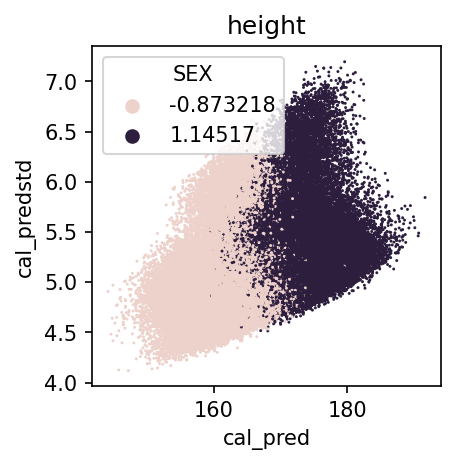

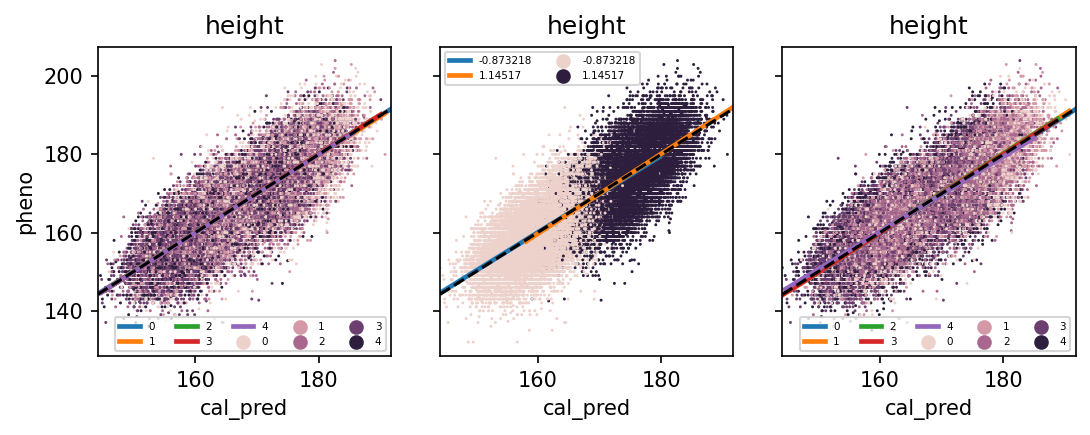

In [4]:
# visualize
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
sns.scatterplot(
    data=df_predint, x="cal_pred", y="cal_predstd", linewidth=0, s=2, hue="SEX"
)
ax.set_title(trait)
fig.show()

plot_group(df_predint, ["AGE", "SEX", "PC1"])

In [5]:
for group in ["AGE", "SEX", "PC1"]:
    display_stats(df_predint, group)

## slope of pheno ~ pred:


q
(-2.0829999999999997, -1.033]    0.996079
(-1.033, -0.334]                 0.993520
(-0.334, 0.365]                  1.003941
(0.365, 1.064]                   1.006182
(1.064, 1.996]                   0.999839
dtype: float64

## residual variance of pheno ~ pred:


q
(-2.0829999999999997, -1.033]    28.543114
(-1.033, -0.334]                 27.750854
(-0.334, 0.365]                  26.390161
(0.365, 1.064]                   25.353911
(1.064, 1.996]                   25.128087
dtype: float64

## total variance of pheno


q
(-2.0829999999999997, -1.033]    86.437521
(-1.033, -0.334]                 85.687537
(-0.334, 0.365]                  86.166233
(0.365, 1.064]                   84.927106
(1.064, 1.996]                   82.312337
dtype: float64

## total variance of pred


q
(-2.0829999999999997, -1.033]    58.352042
(-1.033, -0.334]                 58.702755
(-0.334, 0.365]                  59.313213
(0.365, 1.064]                   58.846967
(1.064, 1.996]                   57.206032
dtype: float64

## Pearson's R2 of pheno ~ pred:


q
(-2.0829999999999997, -1.033]    0.669794
(-1.033, -0.334]                 0.676230
(-0.334, 0.365]                  0.693795
(0.365, 1.064]                   0.701505
(1.064, 1.996]                   0.694764
dtype: float64

## slope of pheno ~ pred:


q
-0.873218    0.978929
 1.145170    1.024321
dtype: float64

## residual variance of pheno ~ pred:


q
-0.873218    24.669519
 1.145170    29.335631
dtype: float64

## total variance of pheno


q
-0.873218    43.079350
 1.145170    50.282968
dtype: float64

## total variance of pred


q
-0.873218    19.219823
 1.145170    19.975683
dtype: float64

## Pearson's R2 of pheno ~ pred:


q
-0.873218    0.427545
 1.145170    0.416824
dtype: float64

## slope of pheno ~ pred:


q
(-0.63, -0.582]     1.002403
(-0.582, -0.565]    1.015657
(-0.565, -0.354]    1.009439
(-0.354, 0.269]     1.006190
(0.269, 2.996]      0.960728
dtype: float64

## residual variance of pheno ~ pred:


q
(-0.63, -0.582]     23.500091
(-0.582, -0.565]    23.218891
(-0.565, -0.354]    25.726662
(-0.354, 0.269]     28.189783
(0.269, 2.996]      32.805545
dtype: float64

## total variance of pheno


q
(-0.63, -0.582]     84.492435
(-0.582, -0.565]    86.485879
(-0.565, -0.354]    84.603036
(-0.354, 0.269]     86.981499
(0.269, 2.996]      81.627219
dtype: float64

## total variance of pred


q
(-0.63, -0.582]     60.738807
(-0.582, -0.565]    61.353613
(-0.565, -0.354]    57.801108
(-0.354, 0.269]     58.075248
(0.269, 2.996]      52.983962
dtype: float64

## Pearson's R2 of pheno ~ pred:


q
(-0.63, -0.582]     0.722326
(-0.582, -0.565]    0.731794
(-0.565, -0.354]    0.696163
(-0.354, 0.269]     0.675965
(0.269, 2.996]      0.599115
dtype: float64

In [6]:
print("Covariates that have largest gamma")
df_params.assign(gamma_abs=df_params["gamma"].abs()).sort_values(
    "gamma_abs", ascending=False
).head(n=10)

Covariates that have largest gamma


,beta,beta_se,beta_z,gamma,gamma_se,gamma_z,slope,slope_se,slope_z,gamma_abs
const,167.057000,0.018918,8830.530000,3.267820,0.005137,636.16900,NaN,NaN,NaN,3.267820
PC1,6.330940,0.025341,249.829000,0.125972,0.006185,20.36800,-0.034534,0.000139,-248.958000,0.125972
SEX,7.715650,0.019237,401.084000,0.083716,0.005290,15.82610,-0.007626,0.000115,-66.583300,0.083716
DEPRIVATION_INDEX,0.325239,0.021375,15.215800,0.054078,0.005826,9.28222,-0.003747,0.000128,-29.219600,0.054078
PGS,4.102860,0.019176,213.962000,0.049469,0.005423,9.12295,-0.002887,0.000117,-24.676100,0.049469
PC4,0.195074,0.019638,9.933360,-0.035340,0.005344,-6.61325,0.001066,0.000120,8.862140,0.035340
AGE,0.019283,0.020975,0.919316,-0.032076,0.005834,-5.49807,-0.007892,0.000127,-62.216000,0.032076
income,-0.404420,0.020449,-19.776600,-0.023266,0.005682,-4.09466,0.005388,0.000124,43.615600,0.023266
PC3,-1.383990,0.020341,-68.038400,0.022100,0.005428,4.07120,0.004522,0.000120,37.790400,0.022100
ever_smoked,0.216878,0.019383,11.189000,-0.009177,0.005435,-1.68832,0.000025,0.000118,0.211456,0.009177


In [7]:
plot_covar_list = ["PC1", "AGE", "SEX", "pheno"]

In [8]:
# quantile range based on point prediction
q_min = 0.84
q_max = 0.86

# number of individuals to show
n_indiv = 6
assert n_indiv % 2 == 0

In [9]:
def format_df_plot(df):
    df = df.copy()
    for col in ["AGE", "SEX"]:
        if col in df.columns:
            df[col] = df_raw[col][df.index]

    if "SEX" in df:
        df["SEX"] = df["SEX"].apply(lambda s: "Male" if s == 1 else "Female")

    df = df.rename(
        columns={
            "SEX": "Sex",
            "DEPRIVATION_INDEX": "Deprivation",
            "AGE": "Age",
        }
    )
    df = df.round(2)
    return df

In [10]:
df_plot = df_predint[
    df_predint["cal_pred"].between(
        df_predint["cal_pred"].quantile(q=q_min),
        df_predint["cal_pred"].quantile(q=q_max),
    )
]

df_tmp = df_plot["cal_predstd"]
a = df_tmp.sort_values().iloc[-df_tmp.shape[0] // 20 :]
b = df_tmp.sort_values().iloc[0 : df_tmp.shape[0] // 20]
print(
    f"Widest 5% = {a.mean():.3g} / narrowest 5% = {b.mean():.3g}; change = {a.mean() / b.mean():.3g}"
)

df_plot = (
    df_plot.sort_values("cal_predstd")
    .iloc[list(np.arange(0, n_indiv // 2)) + list(np.arange(-n_indiv // 2, 0)), :][
        [*plot_covar_list, "cal_pred", "cal_predstd"]
    ]
    .copy()
)

df_plot = format_df_plot(df_plot)
df_plot.index = np.arange(1, len(df_plot) + 1)

Widest 5% = 6.72 / narrowest 5% = 4.86; change = 1.38


In [11]:
display(df_plot)

,PC1,Age,Sex,pheno,cal_pred,cal_predstd
1,-0.57,63,Male,177.0,175.77,4.76
2,-0.58,58,Male,171.0,175.77,4.77
3,-0.57,68,Male,174.0,175.84,4.77
4,2.92,49,Male,174.0,176.11,6.97
5,2.84,52,Male,180.0,175.70,7.04
6,2.90,49,Male,176.0,175.90,7.05


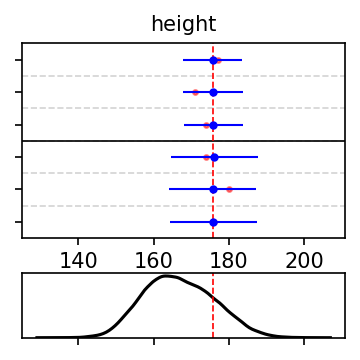

In [36]:
fig, axes = plt.subplots(
    figsize=(2.5, 2.5), dpi=150, nrows=2, gridspec_kw={"height_ratios": [3, 1]}
)
n_indiv = len(df_plot)
axes[0].errorbar(
    y=np.arange(n_indiv - 1, -1, -1),
    x=df_plot["cal_pred"],
    xerr=df_plot["cal_predstd"] * 1.65,
    fmt=".",
    color="blue",
    lw=1.0,
)
axes[0].scatter(
    y=np.arange(n_indiv - 1, -1, -1), x=df_plot["pheno"], alpha=0.5, color="red", s=5
)
for i in range(n_indiv - 1):
    axes[0].axhline(y=i + 0.5, ls="--", color="lightgray", lw=0.8)

axes[0].axhline(y=(n_indiv - 1) / 2, ls="-", color="black", lw=0.8)
axes[0].set_ylim(-0.5, n_indiv - 0.5)
axes[0].set_yticks(np.arange(n_indiv))
axes[0].set_yticklabels([])

sns.kdeplot(df_predint["pheno"].values, ax=axes[1], color="black")
axes[1].set_yticks([])
axes[1].set_ylabel(None)
axes[0].set_xlim(axes[1].get_xlim())
axes[1].set_xticklabels([])

axes[0].axvline(x=df_plot["cal_pred"].mean(), ls="--", lw=0.8, color="red")
axes[1].axvline(x=df_plot["cal_pred"].mean(), ls="--", lw=0.8, color="red")
axes[0].set_title(f"{trait}", fontsize=10)

fig.tight_layout()
plt.subplots_adjust(hspace=0.27)

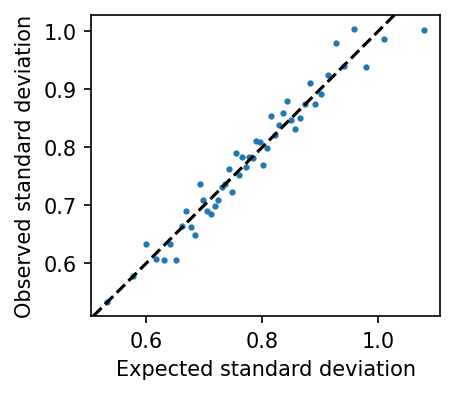

In [13]:
df_tmp = df_predint.copy()
df_tmp["cal_predstd_q"] = pd.qcut(df_tmp["cal_predstd"], q=50).cat.codes

a = df_tmp.groupby("cal_predstd_q").apply(lambda df: np.mean(df["cal_predstd"]))
b = df_tmp.groupby("cal_predstd_q").apply(
    lambda df: np.sqrt(np.mean((df["cal_pred"] - df["pheno"]) ** 2))
)
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
ax.scatter(a, b, s=4)
ax.axline((a[0], a[0]), slope=1, color="black", ls="--")
ax.set_xlabel("Expected standard deviation")
ax.set_ylabel("Observed standard deviation")
ax.set_aspect("equal")